# CQPS

\begin{equation}
H = 4E_C \left(\hat{n} - n_g \right)
\end{equation}

\begin{equation}
   \hat{H} = 4E_C(n - n_g)^2-2E_{J0}\cos(\frac{\pi\Phi}{\Phi_0})\cos \delta
\end{equation}

<img src="data/2021-02-05_cqps/extracted-plots.png"/>
<img src="data/2021-02-05_cqps/extracted-plots-1.png"/>

In [10]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("my_official")
from IPython.display import display
from ipywidgets import interact, interactive, interact_manual, FloatSlider, RadioButtons, Layout
import ipywidgets as widgets
from matplotlib import cm

from quantum_builder import QuantumBuilder

BASE_NAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/qubit_simulations/data/2021-02-05_cqps"

# Single qubit model

In [3]:
SIMULATION_PARAMETERS = {
    "number_of_states": 7,
    "number_of_levels_to_simulate": 2
}
QUBIT_PARAMETERS = {
    "ES": 10,
    "inductive_loop_squares": 30, # 30 140x140nm squares
     **SIMULATION_PARAMETERS
}

cqps_qubit = QuantumBuilder.build_cqps_qubit(
    QUBIT_PARAMETERS, logging_level=logging.INFO,
)

cqps_qubit_constant_manager:68:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

Energies
EL:                                               72.05 (GHz)
ES:                                               10.00 (GHz)

Raw Parameters
number_of_states:                                 7
inductive_loop_squares:                           30.00 (100x100nm²)

Derived Parameters
inductance:                                       45.00 (nH)




## TiN95_TwinQ_3Feb'21_mfield_1-2-3_comb

<IPython.core.display.Javascript object>


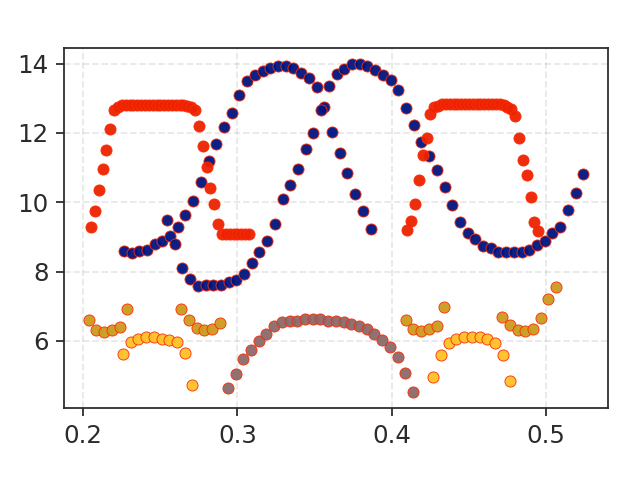

In [13]:
# mA vs GHz
FILES = {
    "A": "#00147f",
    "B": "#ed2200",     # dark red (red2)
    "C": "#ffc125",      # orange,
    "D": "#8b6969",
    "E": "#cd9b1d"
}
data = {}


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
for series in FILES.keys():
    data[series] = np.loadtxt(f"{BASE_NAME}/TiN95_TwinQ_3Feb'21_mfield_1-2-3_comb-{series}.txt")
    
    ax.plot(data[series][:, 0], data[series][:, 1],
            marker="o", 
            color=FILES[series],
            markeredgecolor="#fb2c07", 
            markeredgewidth="0.4", 
            markersize=5, 
            alpha=0.95,
            linestyle="")

<IPython.core.display.Javascript object>


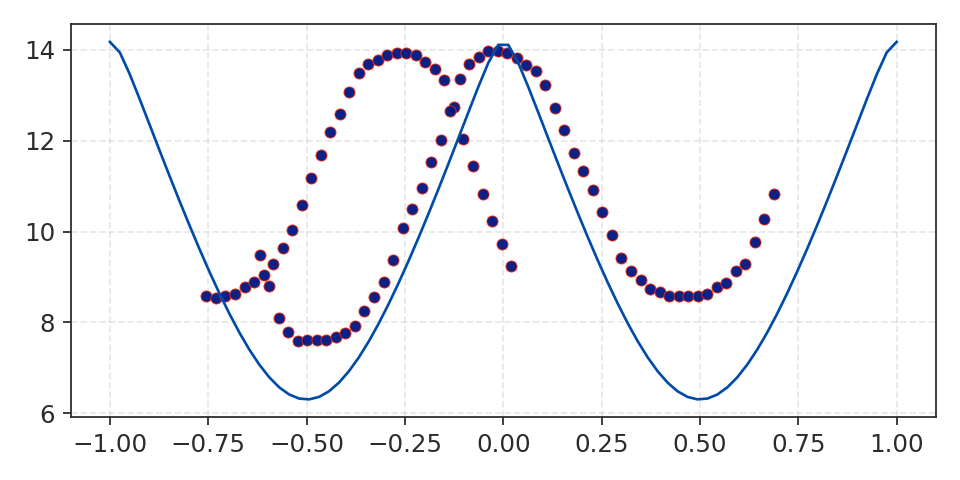

In [14]:
# Selection of data to fit
series = "A"
scaling = 4.84
offset = 1.85
FILE = "TiN95_TwinQ_3Feb'21_mfield_1-2-3_comb"
data_series = np.loadtxt(f"{BASE_NAME}/{FILE}-{series}.txt")

# Initial simulation
FLUX_NUMBER = np.linspace(-1, 1, 80)
EL = 13
ES = 6.4
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])

# Initial plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
data_graph, = ax.plot(data_series[:, 0] * scaling - offset, data_series[:, 1],
        marker="o",
        color=FILES[series],
        markeredgecolor="#fb2c07",
        markeredgewidth="0.4",
        markersize=5,
        alpha=0.95,
        linestyle="")
simulation_graph, = ax.plot(
    FLUX_NUMBER, simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]
)
plt.tight_layout()

# Interactive plot
def cqps_plot(EL: float, ES: float, scaling: float, offset: float):
    cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
    simulation = cqps_qubit.run_simulation(
        FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
    simulation_graph.set_ydata(simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0])
    
    data_graph.set_xdata(data_series[:, 0] * scaling - offset)

scaling_widget = FloatSlider(
    min=0, max=8, step=0.02,
    description="Scaling", value=scaling,
    layout=Layout(width='90%')
)
offset_widget = FloatSlider(
    min=-3, max=3, step=0.02,
    description="Offset", value=offset,
    layout=Layout(width='90%')
)
EL_widget = FloatSlider(
    min=0, max=100,
    description="EL (GHz)", value=EL,
    layout=Layout(width='90%')
)
ES_widget = FloatSlider(
    min=0, max=100,
    description="ES (GHz)", value=ES,
    layout=Layout(width='90%')
)
ui = widgets.VBox([EL_widget, ES_widget, scaling_widget, offset_widget])

In [15]:
out = widgets.interactive_output(
    cqps_plot,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "EL": EL_widget,
        "ES": ES_widget,
        "scaling": scaling_widget,
        "offset": offset_widget
    }
)

display(ui, out)

Output()

### Results Data
 
| **Series** | `ES` (GHz) | `EL` (GHz) |
|------------|------------|------------|
| A          | 7.7        | 12.9       |
| B          | NA         | NA         |
| C          | NA         | NA         |
| D          | NA         | NA         |
| E          | 6.3        | 19.4       |

<IPython.core.display.Javascript object>


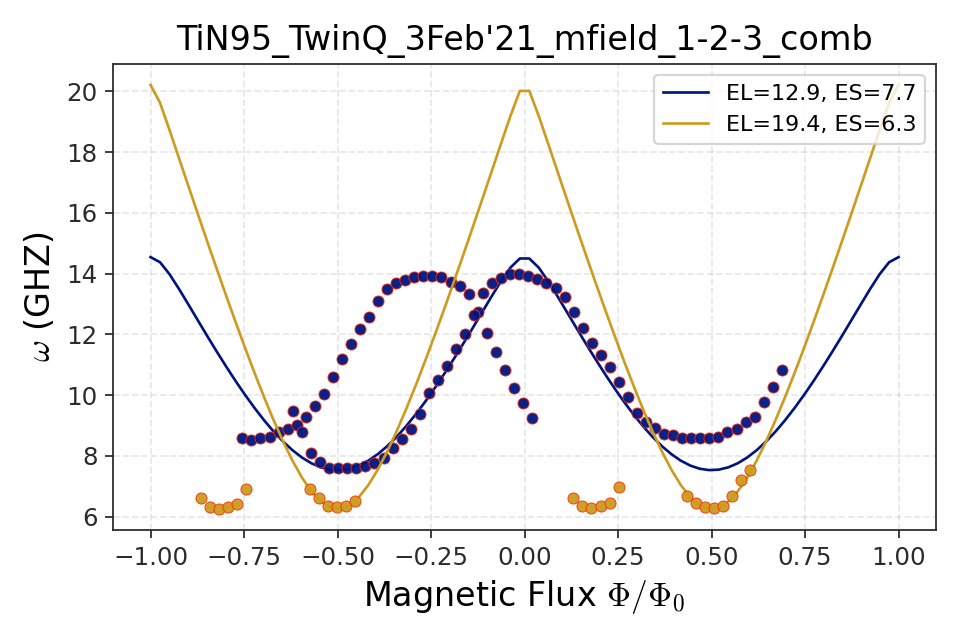

In [16]:
results = {
    "A": {
        "EL": 12.9,
        "ES": 7.7
    },
    "E": {
        "EL": 19.4,
        "ES": 6.3
    }
}

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for series in FILES.keys():
    if series in results:
        EL = results[series]["EL"]
        ES = results[series]["ES"]
        cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
        simulation = cqps_qubit.run_simulation(
            FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
        ax.plot(
            FLUX_NUMBER, simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0],
            label=f"EL={EL}, ES={ES}",
            color=FILES[series],
        )
                
        ax.plot(data[series][:, 0]* scaling - offset, data[series][:, 1],
            marker="o", 
            color=FILES[series],
            markeredgecolor="#fb2c07", 
            markeredgewidth="0.4", 
            markersize=5, 
            alpha=0.95,
            linestyle="")
        
ax.set_xlabel("Magnetic Flux $\Phi/\Phi_0$", size=15)
ax.set_ylabel("$\omega$ (GHZ)", size=15)
ax.legend()
ax.set_title(FILE, size=15)
plt.tight_layout()

plt.savefig(f"./output/2021-02-05_cqps/{FILE}.png")

## TiN95_TwinQ_3Feb'21_mfield_04_data.vi 

<IPython.core.display.Javascript object>


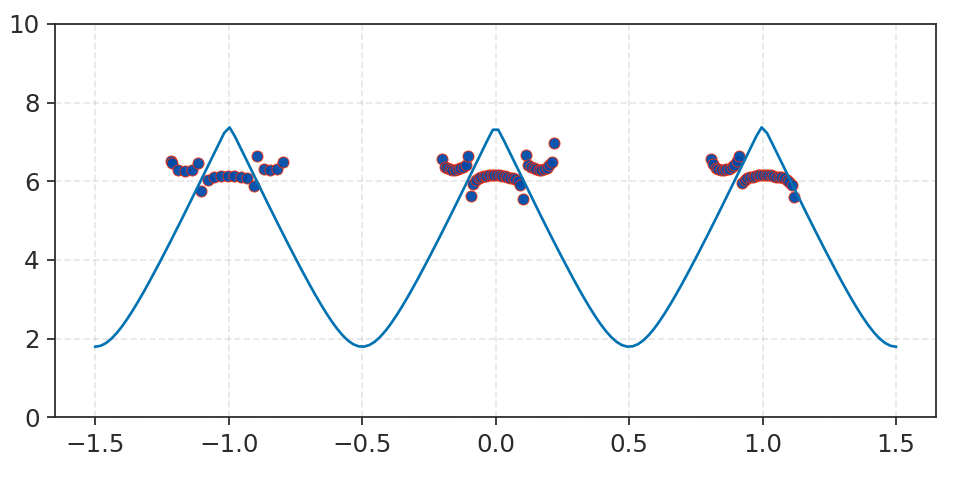

In [17]:
# Selection of data to fit
scaling = 4.9
offset = -0.82
FILE = "TiN95_TwinQ_3Feb'21_mfield_04_data"
data_series = np.loadtxt(f"{BASE_NAME}/{FILE}.txt")

# Initial simulation
FLUX_NUMBER = np.linspace(-1.5, 1.5, 150)
EL = 7.2
ES = 1.8
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])

# Initial plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
data_graph, = ax.plot(data_series[:, 0] * scaling - offset, data_series[:, 1],
        marker="o",
        markeredgecolor="#fb2c07",
        markeredgewidth="0.4",
        markersize=5,
        alpha=0.95,
        linestyle="")
simulation_graph, = ax.plot(
    FLUX_NUMBER, simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]
)
plt.tight_layout()
ax.set_ylim([0, 10])

# Interactive plot
def cqps_plot(EL: float, ES: float, scaling: float, offset: float):
    cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
    simulation = cqps_qubit.run_simulation(
        FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
    simulation_graph.set_ydata(simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0])
    data_graph.set_xdata(data_series[:, 0] * scaling - offset)
 
scaling_widget = FloatSlider(
    min=0, max=8, step=0.02,
    description="Scaling", value=scaling,
    layout=Layout(width='90%')
)
offset_widget = FloatSlider(
    min=-3, max=3, step=0.02,
    description="Offset", value=offset,
    layout=Layout(width='90%')
)
EL_widget = FloatSlider(
    min=0, max=100,
    description="EL (GHz)", value=EL,
    layout=Layout(width='90%')
)
ES_widget = FloatSlider(
    min=0, max=100,
    description="ES (GHz)", value=ES,
    layout=Layout(width='90%')
)
ui = widgets.VBox([EL_widget, ES_widget, scaling_widget, offset_widget])

In [18]:
out = widgets.interactive_output(
    cqps_plot,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "EL": EL_widget,
        "ES": ES_widget,
        "scaling": scaling_widget,
        "offset": offset_widget
    }
)  

display(ui, out)

Output()

<IPython.core.display.Javascript object>


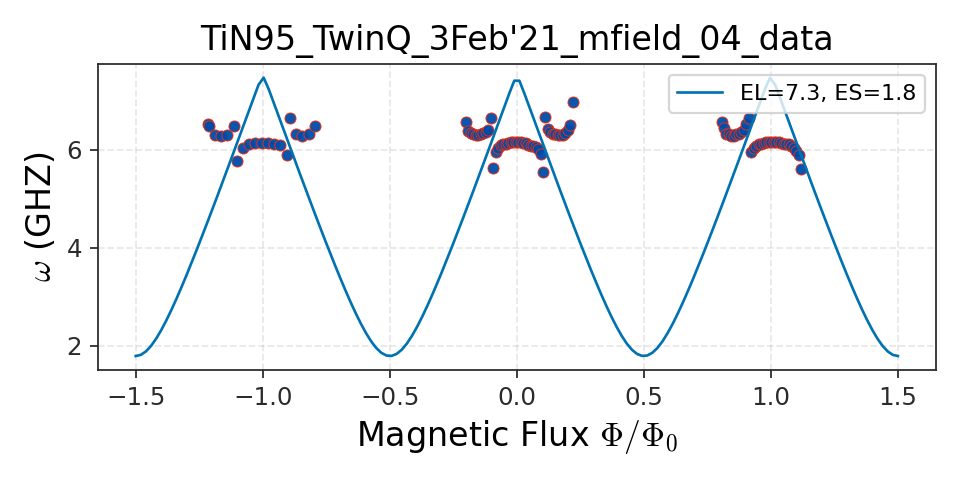

In [19]:
EL = 7.3
ES = 1.8
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
data_graph, = ax.plot(data_series[:, 0] * scaling - offset, data_series[:, 1],
        marker="o",
        markeredgecolor="#fb2c07",
        markeredgewidth="0.4",
        markersize=5,
        alpha=0.95,
        linestyle="")
simulation_graph, = ax.plot(
    FLUX_NUMBER, simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0],
    label=f"EL={EL}, ES={ES}",
)

ax.set_xlabel("Magnetic Flux $\Phi/\Phi_0$", size=15)
ax.set_ylabel("$\omega$ (GHZ)", size=15)
ax.legend()
ax.set_title(FILE, size=15)
plt.tight_layout()

plt.savefig(f"./output/2021-02-05_cqps/{FILE}.png")

## TiN95_TwinQ_3Feb'21_mfield_05_data.vi 

<IPython.core.display.Javascript object>


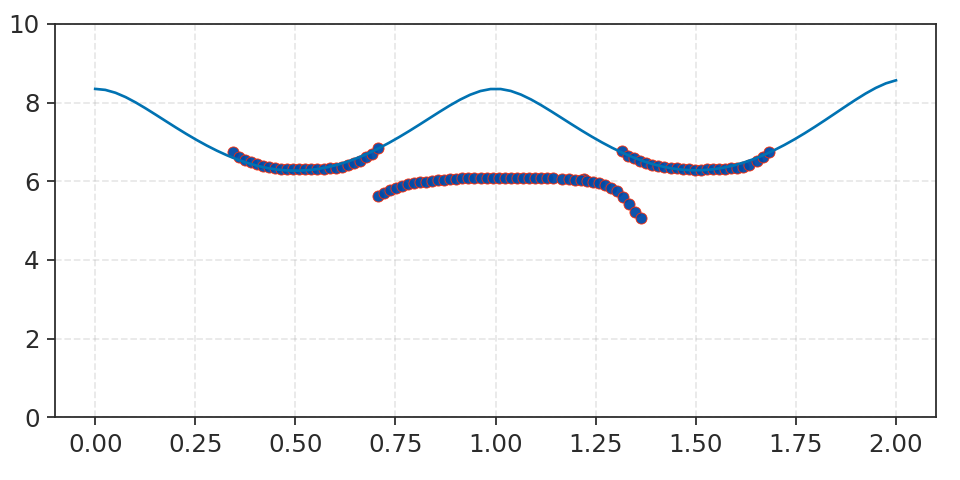

In [20]:
# Selection of data to fit
scaling = 15.1
offset = -0.4
FILE = "TiN95_TwinQ_3Feb'21_mfield_05_data"
data_series = np.loadtxt(f"{BASE_NAME}/{FILE}.txt")

# Initial simulation
FLUX_NUMBER = np.linspace(0, 2, 80)
EL = 6.3
ES = 6.7
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])

# Initial plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
data_graph, = ax.plot(data_series[:, 0] * scaling - offset, data_series[:, 1],
        marker="o",
        markeredgecolor="#fb2c07",
        markeredgewidth="0.4",
        markersize=5,
        alpha=0.95,
        linestyle="")
simulation_graph, = ax.plot(
    FLUX_NUMBER, simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0]
)
plt.tight_layout()
ax.set_ylim([0, 10])

# Interactive plot
def cqps_plot(EL: float, ES: float, scaling: float, offset: float):
    cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
    simulation = cqps_qubit.run_simulation(
        FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])
    simulation_graph.set_ydata(simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0])
    data_graph.set_xdata(data_series[:, 0] * scaling - offset)
 
scaling_widget = FloatSlider(
    min=0, max=20, step=0.1,
    description="Scaling", value=scaling,
    layout=Layout(width='90%')
)
offset_widget = FloatSlider(
    min=-3, max=3, step=0.02,
    description="Offset", value=offset,
    layout=Layout(width='90%')
)
EL_widget = FloatSlider(
    min=0, max=100,
    description="EL (GHz)", value=EL,
    layout=Layout(width='90%')
)
ES_widget = FloatSlider(
    min=0, max=100,
    description="ES (GHz)", value=ES,
    layout=Layout(width='90%')
)
ui = widgets.VBox([EL_widget, ES_widget, scaling_widget, offset_widget])

In [21]:
out = widgets.interactive_output(
    cqps_plot,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "EL": EL_widget,
        "ES": ES_widget,
        "scaling": scaling_widget,
        "offset": offset_widget
    }
)  

display(ui, out)

Output()

<IPython.core.display.Javascript object>


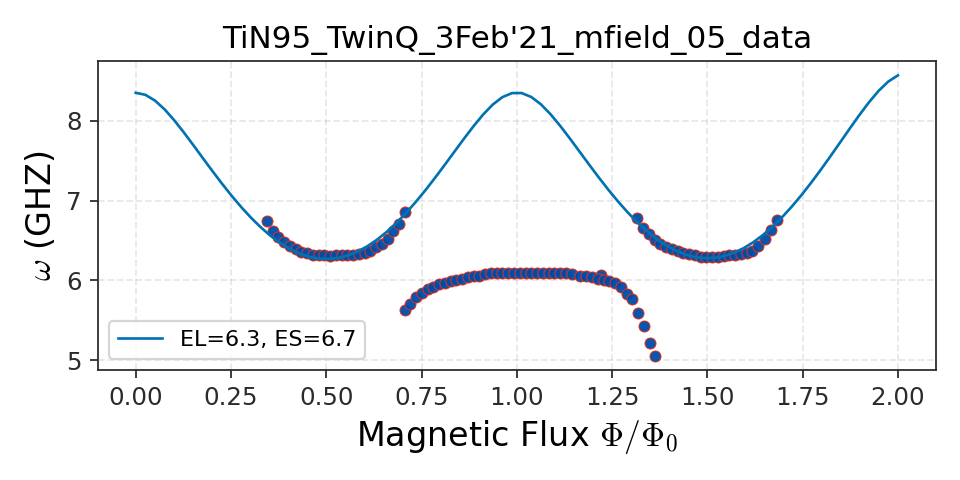

In [22]:
EL = 6.3
ES = 6.7
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
data_graph, = ax.plot(data_series[:, 0] * scaling - offset, data_series[:, 1],
        marker="o",
        markeredgecolor="#fb2c07",
        markeredgewidth="0.4",
        markersize=5,
        alpha=0.95,
        linestyle="")
simulation_graph, = ax.plot(
    FLUX_NUMBER, simulation["eigvals"][:, 1] - simulation["eigvals"][:, 0],
    label=f"EL={EL}, ES={ES}",
)

ax.set_xlabel("Magnetic Flux $\Phi/\Phi_0$", size=15)
ax.set_ylabel("$\omega$ (GHZ)", size=15)
ax.legend()
ax.set_title(FILE, size=14)
plt.tight_layout()

plt.savefig(f"./output/2021-02-05_cqps/{FILE}_version-1.png")

## Eigenstate distribution

cqps_qubit_constant_manager:57:override_parameters
⮑  Overriding to the following values:
EL:       6.3
ES:       6.7


cqps_qubit_simulator:55:simulate
⮑  💻 Running simulation

cqps_qubit_simulator:96:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


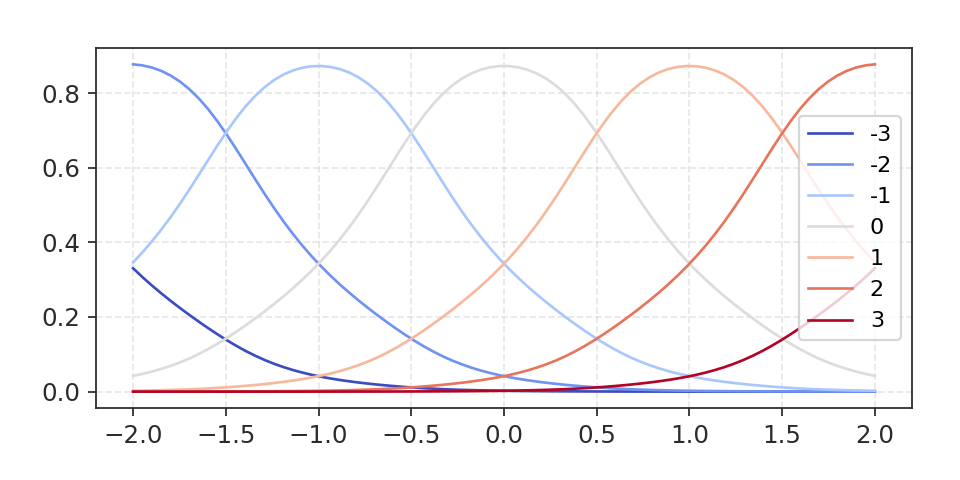

In [60]:
# Selection of data to fit
scaling = 15.1
offset = -0.4
FILE = "TiN95_TwinQ_3Feb'21_mfield_05_data"
data_series = np.loadtxt(f"{BASE_NAME}/{FILE}.txt")
colours = [cm.coolwarm(x) for x in np.linspace(0, 1, SIMULATION_PARAMETERS["number_of_states"])]

# Initial simulation
FLUX_NUMBER = np.linspace(-2, 2, 80)
EL = 6.3
ES = 6.7
cqps_qubit.cqps_qubit_constant_manager.override_parameters(EL, ES)
simulation = cqps_qubit.run_simulation(
    FLUX_NUMBER, SIMULATION_PARAMETERS["number_of_levels_to_simulate"])

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
STATE = 0
for idx, evec in enumerate(np.abs(simulation["eigvecs"][:, STATE]).transpose()):
    ax.plot(FLUX_NUMBER, evec, color=colours[idx], 
            label=idx - cqps_qubit.cqps_qubit_constant_manager.offset_to_apply)
ax.legend()

# Reflection


# Log Voltage

<IPython.core.display.Javascript object>


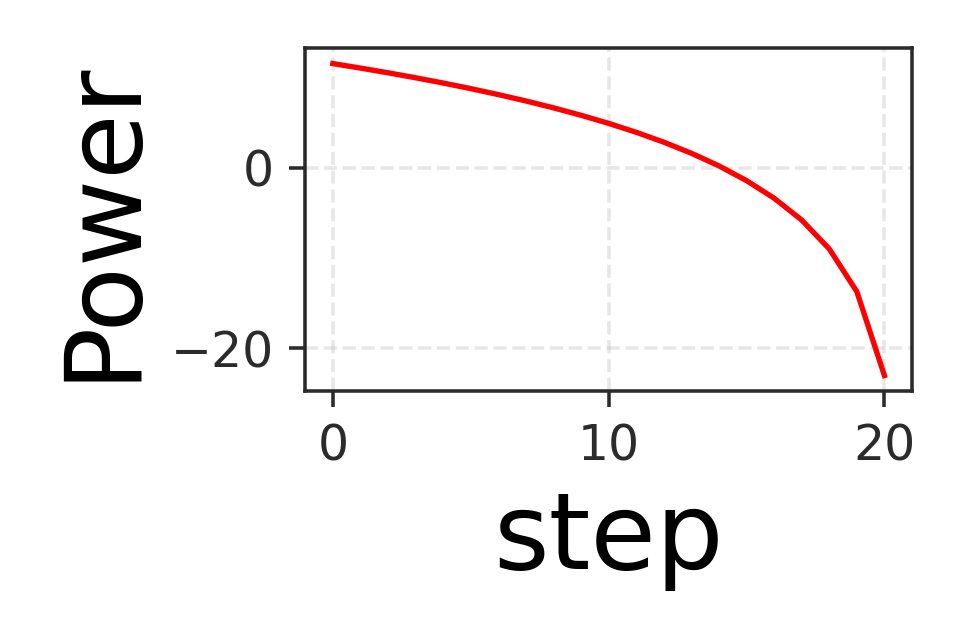

In [77]:
voltage = np.linspace(3.1622, 0.1, 21)

power = np.log(voltage) * 10

plt.plot(power,color='red')
# plt.plot(voltage,color='black')
plt.xlabel("step")
plt.ylabel("Power")
plt.tight_layout()